## load and clean the data

In [58]:
import pandas as pd
df = pd.read_csv('Data/Record_data.csv')

In [59]:
df.head()

,Recording URL,Publicly Shared,Already Watched,Comments,Labels,Created,New / Returning,Hotjar User ID,Country,Action Count,...,Operating System,Referrer URL,Landing Page URL,Exit Page URL,Rage Clicks,U-Turns,Incoming Feedback,Net Promoter Score®,Events,Target
0,https://insights.hotjar.com/r?site=2751917&rec...,False,True,NaN,NaN,2024-05-21T14:53:08,Returning user,812ba4f5,US,292,...,Windows,NaN,https://shorelinebreakers.playbookapi.com/cont...,https://shorelinebreakers.playbookapi.com/cont...,4,1,NaN,NaN,NaN,Yes
1,https://insights.hotjar.com/r?site=2751917&rec...,False,False,NaN,NaN,2024-05-24T14:39:36,New user,a7878fea,CA,565,...,Windows,https://ampedsportslab.com/,https://ampedsports.playbookapi.com/programs/r...,https://ampedsports.playbookapi.com/programs/m...,1,0,NaN,NaN,NaN,Yes
2,https://insights.hotjar.com/r?site=2751917&rec...,False,True,NaN,NaN,2024-05-16T14:54:15,Returning user,09ae2632,US,1479,...,Mac,NaN,https://playbooksandbox3.herokuapp.com/control...,https://playbooksandbox3.herokuapp.com/control...,1,4,NaN,NaN,NaN,No
3,https://insights.hotjar.com/r?site=2751917&rec...,False,True,NaN,NaN,2024-05-12T10:40:02,Returning user,90e8d0f4,US,440,...,Windows,NaN,https://www.nycbasketballleague.com/,https://www.nycbasketballleague.com/player/194...,1,1,NaN,NaN,NaN,No
4,https://insights.hotjar.com/r?site=2751917&rec...,False,True,NaN,NaN,2024-05-10T12:26:19,Returning user,cce2b37e,US,702,...,Windows,https://theplaygroundathletes.playbookapi.com/...,https://theplaygroundathletes.playbookapi.com/...,https://theplaygroundathletes.playbookapi.com/...,3,3,NaN,NaN,NaN,No


In [60]:
column_names = df.columns
print(column_names)


Index(['Recording URL', 'Publicly Shared', 'Already Watched', 'Comments',
       'Labels', 'Created', 'New / Returning', 'Hotjar User ID', 'Country',
       'Action Count', 'Page Count', 'Duration (seconds)', 'Device',
       'Device Screen Size', 'Browser', 'Operating System', 'Referrer URL',
       'Landing Page URL', 'Exit Page URL', 'Rage Clicks', 'U-Turns',
       'Incoming Feedback', 'Net Promoter Score®', 'Events', 'Target'],
      dtype='object')


### Drop the columns which are URL

In [61]:
df = df.drop(columns = ["Recording URL", "Publicly Shared", "Already Watched", "Comments", "Labels", "Created", "Hotjar User ID", "Country", "Referrer URL", "Landing Page URL", "Exit Page URL", "Events",'Device','Device Screen Size', "Incoming Feedback", 'Net Promoter Score®'])

In [62]:
df.head()

,New / Returning,Action Count,Page Count,Duration (seconds),Browser,Operating System,Rage Clicks,U-Turns,Target
0,Returning user,292,18,3778,Chrome,Windows,4,1,Yes
1,New user,565,22,3829,Edge,Windows,1,0,Yes
2,Returning user,1479,203,2987,Chrome,Mac,1,4,No
3,Returning user,440,49,1311,Edge,Windows,1,1,No
4,Returning user,702,34,1560,Chrome,Windows,3,3,No


### Data Overview

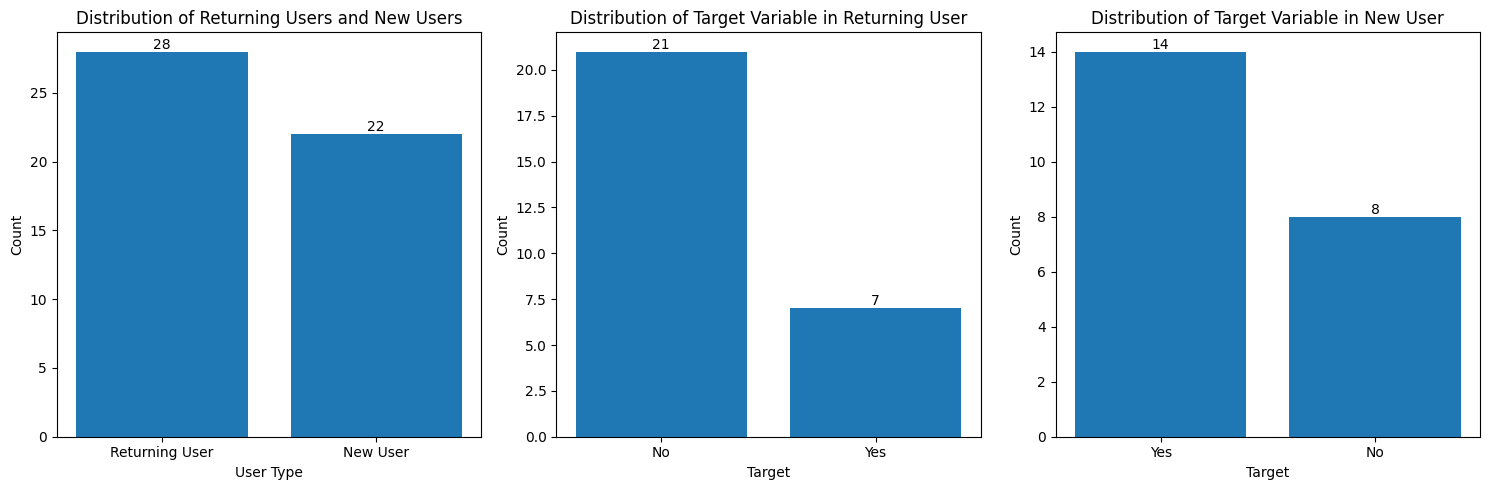

In [68]:
# Count the number of returning users and new users
returning_users = df['New / Returning'].value_counts()['Returning user']
new_users = df['New / Returning'].value_counts()['New user']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distribution of New/Returning User Feature
returning_users = df['New / Returning'].value_counts()['Returning user']
new_users = df['New / Returning'].value_counts()['New user']

axes[0].bar(['Returning User', 'New User'], [returning_users, new_users])
axes[0].set_xlabel('User Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Returning Users and New Users')
axes[0].text(0, returning_users, str(returning_users), ha='center', va='bottom')
axes[0].text(1, new_users, str(new_users), ha='center', va='bottom')

# Distribution of Target Variable in Returning User
target_counts_returning = df[df['New / Returning'] == 'Returning user']['Target'].value_counts()
axes[1].bar(target_counts_returning.index, target_counts_returning.values)
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Target Variable in Returning User')
for i, v in enumerate(target_counts_returning.values):
    axes[1].text(i, v, str(v), ha='center', va='bottom')

# Distribution of Target Variable in New User
target_counts_new = df[df['New / Returning'] == 'New user']['Target'].value_counts()
axes[2].bar(target_counts_new.index, target_counts_new.values)
axes[2].set_xlabel('Target')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Target Variable in New User')
for i, v in enumerate(target_counts_new.values):
    axes[2].text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()
plt.show()


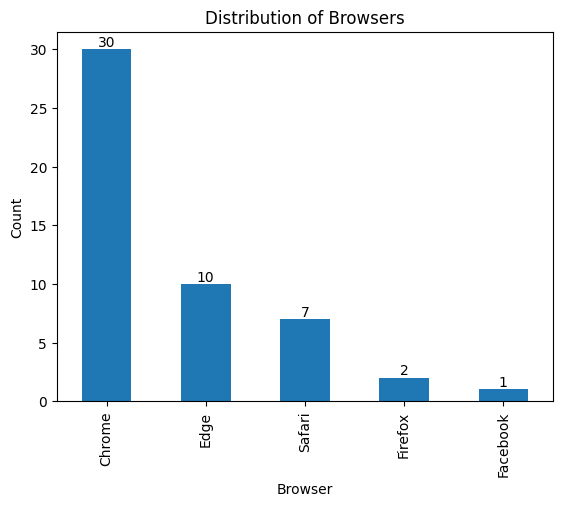

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each browser
browser_counts = df['Browser'].value_counts()

# Create a bar plot
ax = browser_counts.plot(kind='bar')

# Add the corresponding values to the graph
for i, v in enumerate(browser_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Set the labels and title
plt.xlabel('Browser')
plt.ylabel('Count')
plt.title('Distribution of Browsers')

# Show the plot
plt.show()


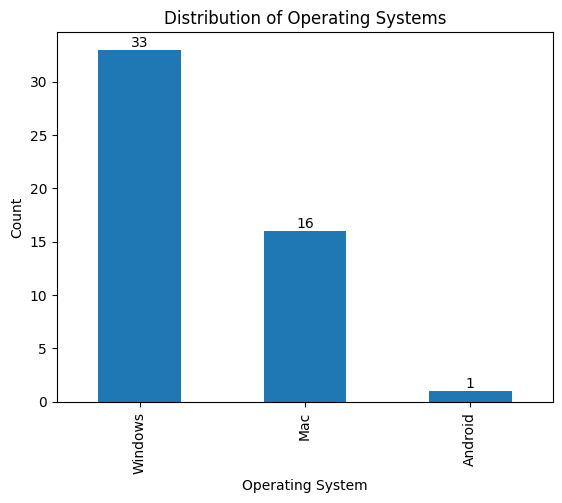

In [66]:
# Count the occurrences of each operating system
os_counts = df['Operating System'].value_counts()

# Create a bar plot
ax = os_counts.plot(kind='bar')

# Add the corresponding values to the graph
for i, v in enumerate(os_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Set the labels and title
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.title('Distribution of Operating Systems')

# Show the plot
plt.show()


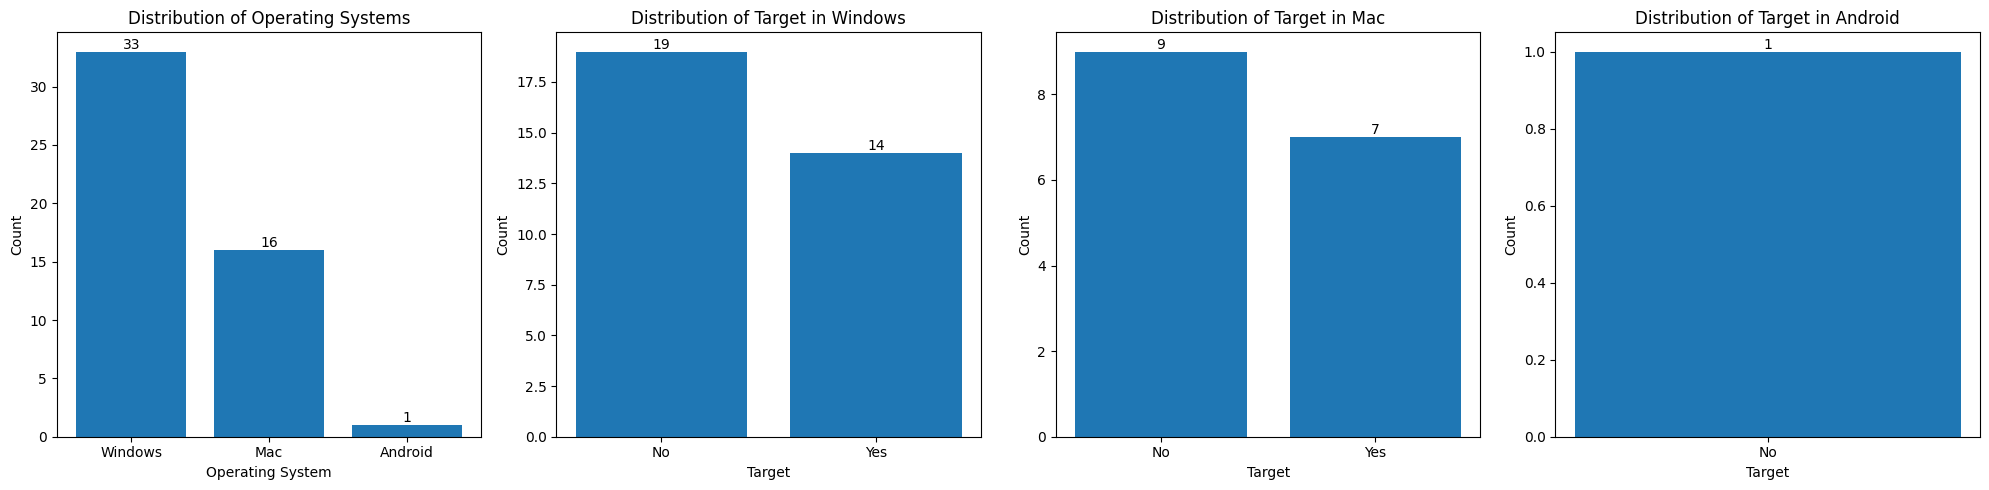

In [70]:
# Create a figure and four subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot the distribution of the operating system
os_counts = df['Operating System'].value_counts()
axes[0].bar(os_counts.index, os_counts.values)
axes[0].set_xlabel('Operating System')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Operating Systems')

# Add text annotations to each bar in the plot
for i, v in enumerate(os_counts.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom')

# Plot the distribution of the target in Windows
target_counts_windows = df[df['Operating System'] == 'Windows']['Target'].value_counts()
axes[1].bar(target_counts_windows.index, target_counts_windows.values)
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Target in Windows')

# Add text annotations to each bar in the plot
for i, v in enumerate(target_counts_windows.values):
    axes[1].text(i, v, str(v), ha='center', va='bottom')

# Plot the distribution of the target in Mac
target_counts_mac = df[df['Operating System'] == 'Mac']['Target'].value_counts()
axes[2].bar(target_counts_mac.index, target_counts_mac.values)
axes[2].set_xlabel('Target')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution of Target in Mac')

# Add text annotations to each bar in the plot
for i, v in enumerate(target_counts_mac.values):
    axes[2].text(i, v, str(v), ha='center', va='bottom')

# Plot the distribution of the target in Android
target_counts_android = df[df['Operating System'] == 'Android']['Target'].value_counts()
axes[3].bar(target_counts_android.index, target_counts_android.values)
axes[3].set_xlabel('Target')
axes[3].set_ylabel('Count')
axes[3].set_title('Distribution of Target in Android')

# Add text annotations to each bar in the plot
for i, v in enumerate(target_counts_android.values):
    axes[3].text(i, v, str(v), ha='center', va='bottom')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


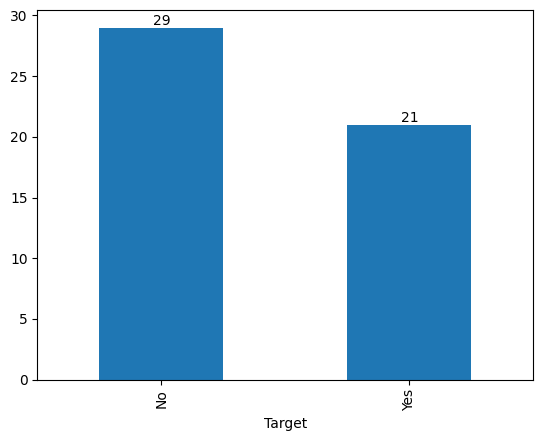

In [16]:
target_counts = df['Target'].value_counts()
target_counts.plot(kind='bar')
import matplotlib.pyplot as plt

target_counts = df['Target'].value_counts()
ax = target_counts.plot(kind='bar')

# Add the corresponding values to the graph
for i, v in enumerate(target_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [17]:
df.isna().sum()

New / Returning       0
Action Count          0
Page Count            0
Duration (seconds)    0
Browser               0
Operating System      0
Rage Clicks           0
U-Turns               0
Target                0
dtype: int64

In [18]:
# Apply one-hot encoding to the 'key' column
key_encoded = pd.get_dummies(df['New / Returning'])

# Combine the new binary columns with the original dataset
df = df.join(key_encoded)


In [19]:
df.drop(columns = ['New / Returning'], inplace=True)
df.head()

,Action Count,Page Count,Duration (seconds),Browser,Operating System,Rage Clicks,U-Turns,Target,New user,Returning user
0,292,18,3778,Chrome,Windows,4,1,Yes,False,True
1,565,22,3829,Edge,Windows,1,0,Yes,True,False
2,1479,203,2987,Chrome,Mac,1,4,No,False,True
3,440,49,1311,Edge,Windows,1,1,No,False,True
4,702,34,1560,Chrome,Windows,3,3,No,False,True


In [20]:
key_encoded = pd.get_dummies(df['Browser'])

df = df.join(key_encoded)

In [21]:
df.drop(columns = ['Browser'], inplace=True)
df.head()

,Action Count,Page Count,Duration (seconds),Operating System,Rage Clicks,U-Turns,Target,New user,Returning user,Chrome,Edge,Facebook,Firefox,Safari
0,292,18,3778,Windows,4,1,Yes,False,True,True,False,False,False,False
1,565,22,3829,Windows,1,0,Yes,True,False,False,True,False,False,False
2,1479,203,2987,Mac,1,4,No,False,True,True,False,False,False,False
3,440,49,1311,Windows,1,1,No,False,True,False,True,False,False,False
4,702,34,1560,Windows,3,3,No,False,True,True,False,False,False,False


In [22]:
key_encoded = pd.get_dummies(df['Operating System'])

df = df.join(key_encoded)

In [23]:
df.drop(columns = ['Operating System'], inplace=True)
df.head()

,Action Count,Page Count,Duration (seconds),Rage Clicks,U-Turns,Target,New user,Returning user,Chrome,Edge,Facebook,Firefox,Safari,Android,Mac,Windows
0,292,18,3778,4,1,Yes,False,True,True,False,False,False,False,False,False,True
1,565,22,3829,1,0,Yes,True,False,False,True,False,False,False,False,False,True
2,1479,203,2987,1,4,No,False,True,True,False,False,False,False,False,True,False
3,440,49,1311,1,1,No,False,True,False,True,False,False,False,False,False,True
4,702,34,1560,3,3,No,False,True,True,False,False,False,False,False,False,True


In [24]:
df['Target'] = df['Target'].replace({'Yes': True, 'No': False})


In [25]:
df.head()

,Action Count,Page Count,Duration (seconds),Rage Clicks,U-Turns,Target,New user,Returning user,Chrome,Edge,Facebook,Firefox,Safari,Android,Mac,Windows
0,292,18,3778,4,1,True,False,True,True,False,False,False,False,False,False,True
1,565,22,3829,1,0,True,True,False,False,True,False,False,False,False,False,True
2,1479,203,2987,1,4,False,False,True,True,False,False,False,False,False,True,False
3,440,49,1311,1,1,False,False,True,False,True,False,False,False,False,False,True
4,702,34,1560,3,3,False,False,True,True,False,False,False,False,False,False,True


## Modeling

#### Data Preparation

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.4, random_state=14477830)

# Print the shapes of the training and testing set
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (30, 16)
Testing data shape: (20, 16)


In [27]:
x_train = train_data.drop(columns = ['Target'])
y_train = train_data['Target']
x_test = test_data.drop(columns = ['Target'])
y_test = test_data['Target']

In [28]:
from sklearn.preprocessing import StandardScaler

# Get the column names of the numerical features
numerical_features = [col for col in x_train.columns if col not in ["New user", "Returning user", "Chrome", "Edge", "Facebook", "Firefox", "Safari", "Windows", "iOS", "Mac", "Android"]]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train[numerical_features])

# Transform the numerical features in x_train and x_test
x_train[numerical_features] = scaler.transform(x_train[numerical_features])
x_test[numerical_features] = scaler.transform(x_test[numerical_features])


In [29]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
def report(y_test, y_pred, y_pred_prob):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate the recall
    recall = recall_score(y_test, y_pred)

    # Calculate the precision
    precision = precision_score(y_test, y_pred)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred)

    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the ROC curve
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # Print the AUC score, accuracy, recall, precision, F1 score, and confusion matrix
    print('AUC:', auc_score)
    print('Accuracy:', accuracy)
    print('Recall:', recall)
    print('Precision:', precision)
    print('F1 Score:', f1)
    print('Confusion Matrix:')
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

### SVM

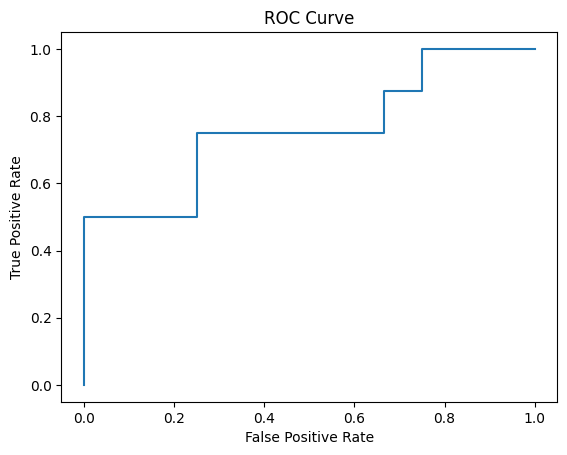

AUC: 0.7604166666666667
Accuracy: 0.75
Recall: 0.75
Precision: 0.6666666666666666
F1 Score: 0.7058823529411765
Confusion Matrix:


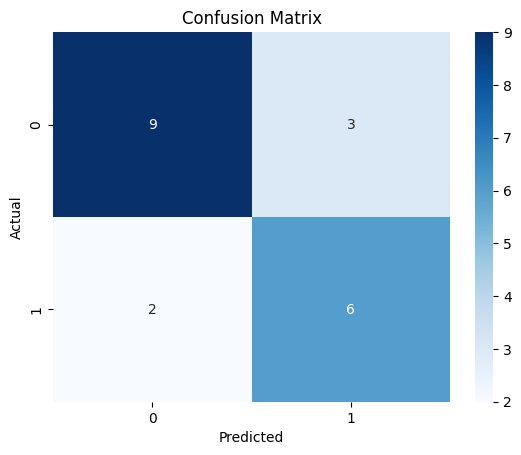

In [30]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(C=1, kernel='rbf', gamma='scale', probability=True, random_state=14477830)

# Fit the model on the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(x_test)

# Calculate the probabilities for the positive class
y_pred_prob = svm_model.decision_function(x_test)

report(y_test, y_pred, y_pred_prob)




In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an SVM model
svm_model = SVC(probability=True, random_state=14477830)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring=['accuracy', 'roc_auc'], refit='roc_auc', cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(x_train, y_train)

# Get the best configuration
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate each combination of parameters using AUC score and accuracy
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_roc_auc'], results['params']):
    print("Parameters:", params)
    print("AUC Score:", mean_score)
    print("Accuracy:", results['mean_test_accuracy'][results['params'].index(params)])
    print()

print("Best Configuration:")
print(best_params)


Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
AUC Score: 0.5777777777777778
Accuracy: 0.5333333333333333

Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
AUC Score: 0.7861111111111111
Accuracy: 0.5666666666666667

Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
AUC Score: 0.5777777777777778
Accuracy: 0.5333333333333333

Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
AUC Score: 0.675
Accuracy: 0.5666666666666667

Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
AUC Score: 0.6277777777777778
Accuracy: 0.6333333333333333

Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
AUC Score: 0.8111111111111111
Accuracy: 0.7

Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
AUC Score: 0.6277777777777778
Accuracy: 0.6333333333333333

Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
AUC Score: 0.675
Accuracy: 0.5666666666666667

Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
AUC Score: 0.5805555555555555
Accurac

##### Decision Tree

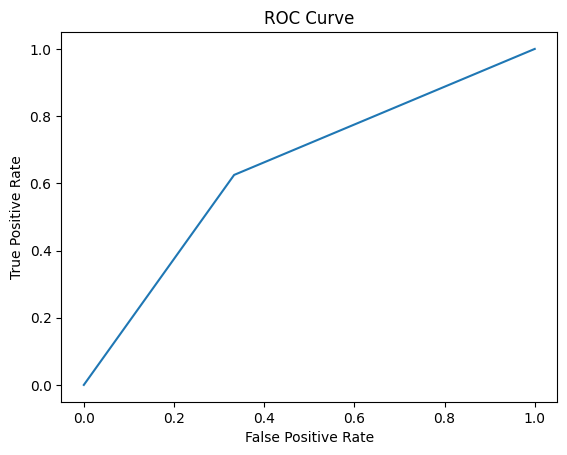

AUC: 0.6458333333333334
Accuracy: 0.65
Recall: 0.625
Precision: 0.5555555555555556
F1 Score: 0.5882352941176471
Confusion Matrix:


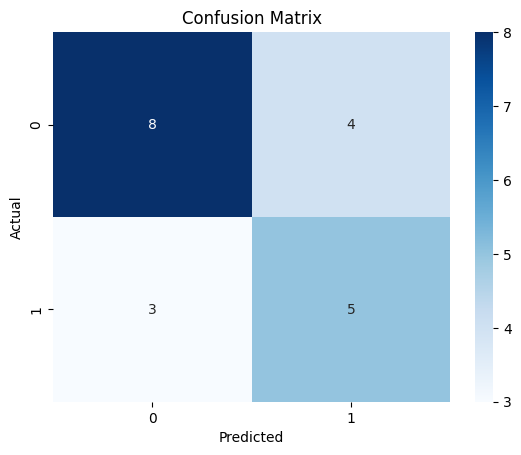

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
tree_model = DecisionTreeClassifier(criterion= "gini", max_depth=10, min_samples_split = 2, max_features = 'sqrt', random_state=14477830)

# Fit the model on the training data
tree_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = tree_model.predict(x_test)

# Calculate the probabilities for the positive class
y_pred_prob = tree_model.predict_proba(x_test)[:, 1]

report(y_test, y_pred, y_pred_prob)


##### Random forest

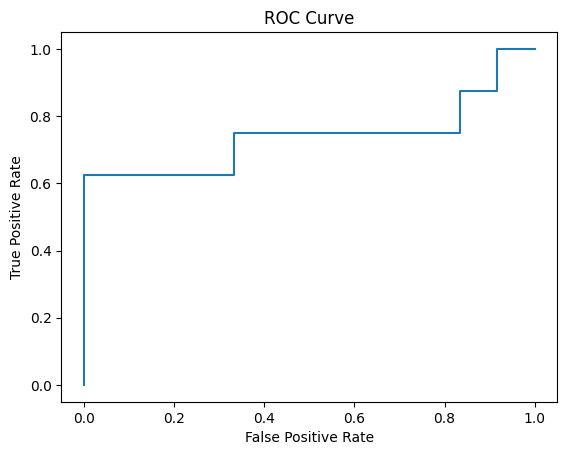

AUC: 0.7395833333333334
Accuracy: 0.75
Recall: 0.625
Precision: 0.7142857142857143
F1 Score: 0.6666666666666666
Confusion Matrix:


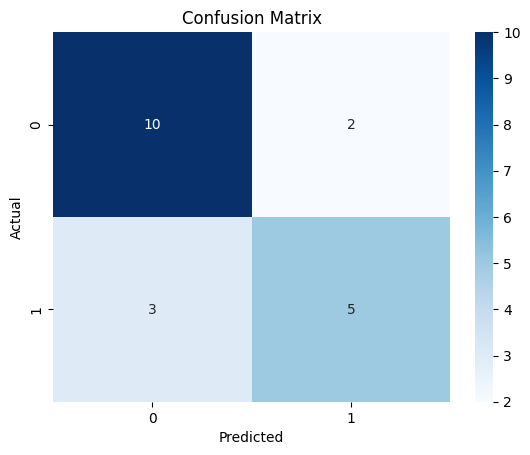

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest model
rf_model = RandomForestClassifier(n_estimators=200, criterion = "entropy", max_depth = 10, max_features = "sqrt", min_samples_split = 5, random_state=14477830)

# Fit the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(x_test)

# Calculate the probabilities for the positive class
y_pred_prob = rf_model.predict_proba(x_test)[:, 1]

report(y_test, y_pred, y_pred_prob)

##### Adaboost

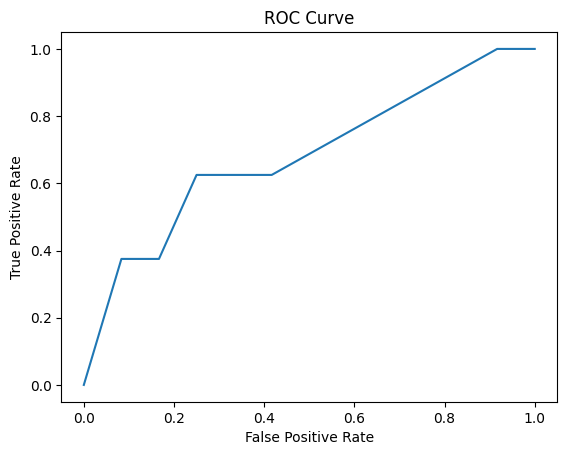

AUC: 0.6822916666666666
Accuracy: 0.65
Recall: 0.375
Precision: 0.6
F1 Score: 0.46153846153846156
Confusion Matrix:


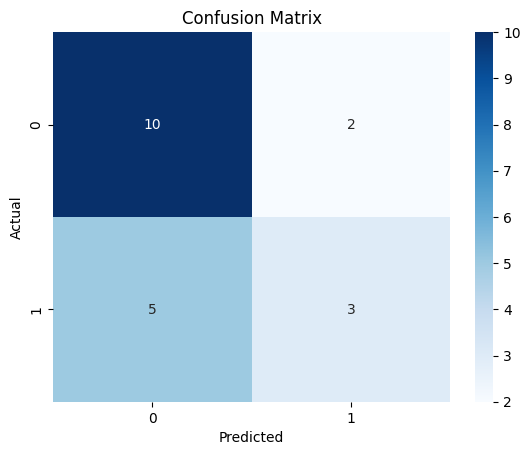

In [34]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=200, learning_rate= 0.01, algorithm = "SAMME", random_state=14477830)

# Fit the model on the training data
adaboost_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = adaboost_model.predict(x_test)

# Calculate the probabilities for the positive class
y_pred_prob = adaboost_model.predict_proba(x_test)[:, 1]

report(y_test, y_pred, y_pred_prob)


##### Logistic Regression

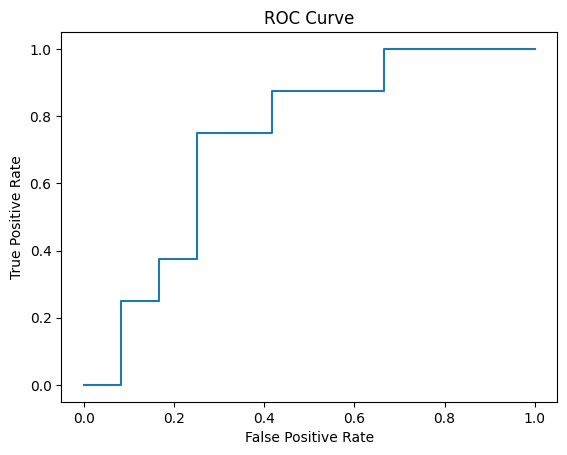

AUC: 0.7291666666666666
Accuracy: 0.65
Recall: 0.5
Precision: 0.5714285714285714
F1 Score: 0.5333333333333333
Confusion Matrix:


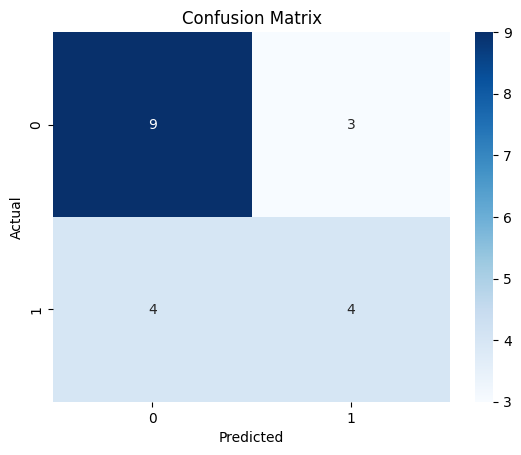

In [35]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(x_test)

# Calculate the probabilities for the positive class
y_pred_prob = logreg_model.predict_proba(x_test)[:, 1]

report(y_test, y_pred, y_pred_prob)


#### XGBoost

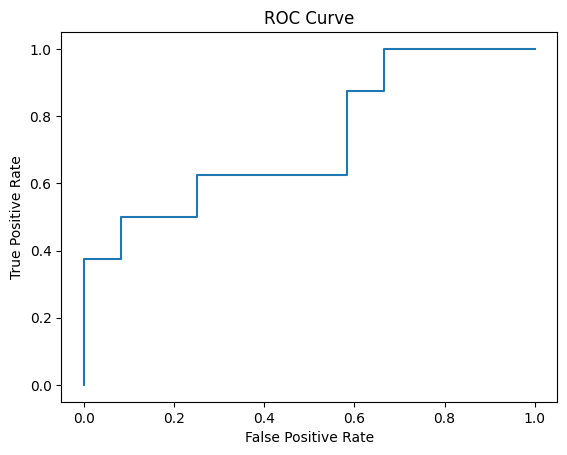

AUC: 0.7291666666666667
Accuracy: 0.7
Recall: 0.5
Precision: 0.6666666666666666
F1 Score: 0.5714285714285714
Confusion Matrix:


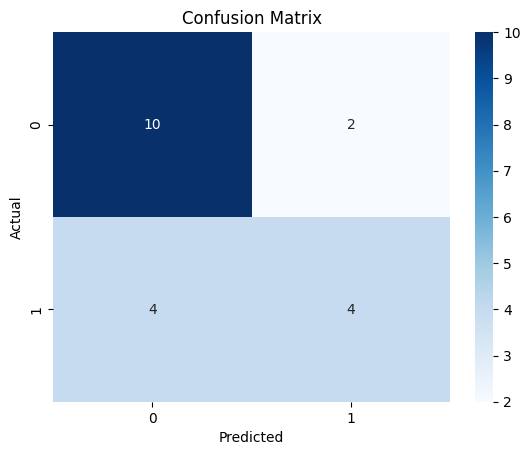

In [36]:
from xgboost import XGBClassifier

# Create an XGBoost classifier model
xgb_model = XGBClassifier(objective= "binary:logistic", eval_metric = "auc", random_state=14477830)

# Fit the model on the training data
xgb_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(x_test)

# Calculate the probabilities for the positive class
y_pred_prob = xgb_model.predict_proba(x_test)[:, 1]

report(y_test, y_pred, y_pred_prob)


c:\Program Files\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step - accuracy: 0.4333 - loss: 0.6996 - val_accuracy: 0.7500 - val_loss: 0.6487
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7000 - loss: 0.6537 - val_accuracy: 0.7500 - val_loss: 0.6216
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.8333 - loss: 0.6218 - val_accuracy: 0.7500 - val_loss: 0.6035
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8333 - loss: 0.5979 - val_accuracy: 0.7500 - val_loss: 0.5902
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8333 - loss: 0.5775 - val_accuracy: 0.7500 - val_loss: 0.5800
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8333 - loss: 0.5585 - val_accuracy: 0.7000 - val_loss: 0.5715
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8333 - loss: 0.5399 - val_accuracy: 0.7000 - val_loss: 0.5647
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8333 - loss: 0.5213 - val_accuracy: 0.7000 - val_loss:

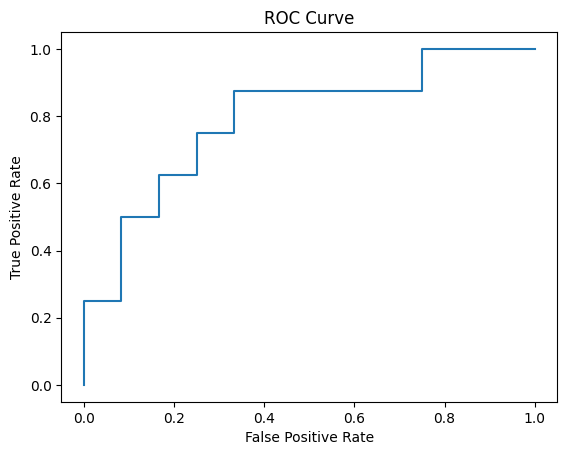

AUC: 0.7916666666666667
Accuracy: 0.7
Recall: 0.625
Precision: 0.625
F1 Score: 0.625
Confusion Matrix:


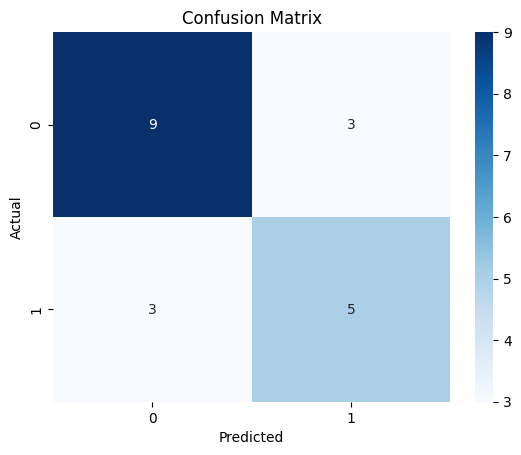

In [37]:
import tensorflow as tf
from tensorflow import keras

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)

# Fit the model on the training data
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Make predictions on the test data
#y_pred = model.predict_classes(x_test)

# Calculate the probabilities for the positive class
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)
# Report the results
report(y_test, y_pred, y_pred_prob)


### Doing PCA

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, random_state=14477830)

pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [39]:
import pickle
# Specify the file path to save the PCA object
#pca_file_path = 'pca_model.pkl'

# Save the PCA object to the file
#with open(pca_file_path, 'wb') as file:
    #pickle.dump(pca, file)

In [40]:
num_components = pca.n_components_
print("Number of principal components saved:", num_components)

Number of principal components saved: 6


In [41]:
# Calculate the eigenvalues of the covariance matrix
eigenvalues = pca.explained_variance_

# Count the number of principal components with eigenvalue > 1
num_components = sum(eigenvalues > 1)

# Calculate the total variance explained by these principal components
total_variance_explained = sum(eigenvalues[:num_components]) / sum(eigenvalues)

num_components, total_variance_explained


(2, 0.7244588486239588)

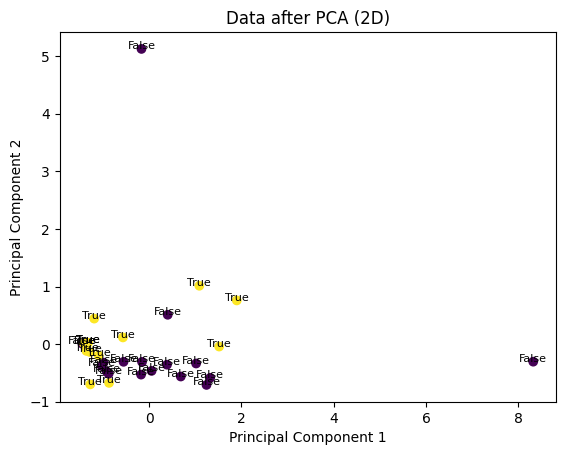

In [42]:
# Create a scatter plot of the data after PCA
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA (2D)')

# Add labels to the data points
for i, label in enumerate(y_train):
    plt.text(x_train_pca[i, 0], x_train_pca[i, 1], str(label), color='black', fontsize=8, ha='center')

plt.show()


In [43]:
# Get the loadings of the principal components
loadings = pca.components_

# Get the names of the predictors
predictor_names = x_train.columns

# Create a dataframe to store the loadings
loadings_df = pd.DataFrame(loadings[:2,].T, columns=['PC1', 'PC2'], index=predictor_names)

# Sort the loadings by absolute value in descending order
loadings_df['PC1_abs'] = abs(loadings_df['PC1'])
loadings_df['PC2_abs'] = abs(loadings_df['PC2'])
loadings_df = loadings_df.sort_values(by=['PC1_abs', 'PC2_abs'], ascending=False)

# Print the top predictors contributing to the first two principal components
top_predictors = loadings_df.head(10)[['PC1', 'PC2']]
print(top_predictors)


                         PC1       PC2
Action Count        0.510683  0.105989
Page Count          0.503438 -0.106580
Duration (seconds)  0.480963  0.019561
U-Turns             0.464252 -0.060676
Edge                0.111614 -0.069661
New user           -0.090613  0.156345
Returning user      0.090613 -0.156345
Chrome             -0.065342  0.134420
Rage Clicks         0.061430  0.936556
Firefox            -0.025885 -0.007904


Best number of clusters: 14


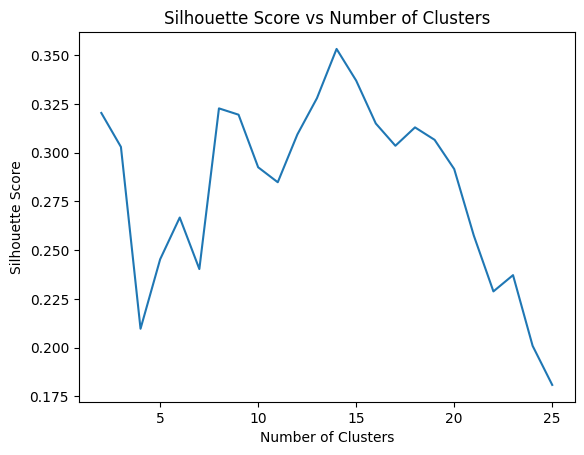

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a list to store the silhouette scores
silhouette_scores = []

# Define the range of number of clusters to try
min_clusters = 2
max_clusters = 25

# Perform K-means clustering for different number of clusters
for n_clusters in range(min_clusters, max_clusters+1):
    # Create a K-means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=14477830)
    
    # Fit the model on the data after PCA
    kmeans.fit(x_train_pca)
    
    # Predict the cluster labels for the data after PCA
    cluster_labels = kmeans.predict(x_train_pca)
    
    # Calculate the silhouette score for the current number of clusters
    silhouette_scores.append(silhouette_score(x_train_pca, cluster_labels))

# Find the best number of clusters based on the highest silhouette score
best_num_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters

# Print the best number of clusters
print("Best number of clusters:", best_num_clusters)

# Plot the silhouette scores against the number of clusters
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()


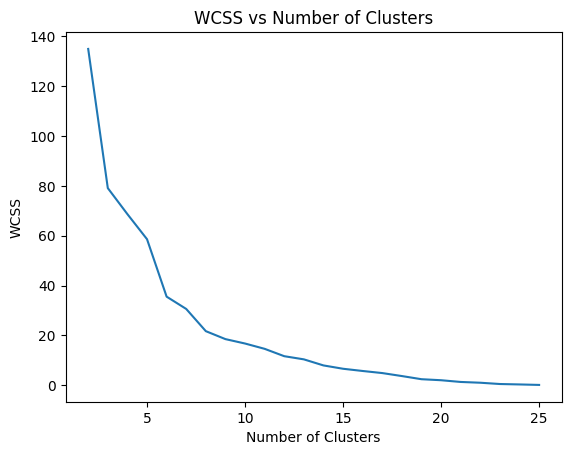

Best number of clusters: 2


In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a list to store the WCSS values
wcss = []

# Define the range of number of clusters to try
min_clusters = 2
max_clusters = 25

# Perform K-means clustering for different number of clusters
for n_clusters in range(min_clusters, max_clusters+1):
    # Create a K-means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=14477830)
    
    # Fit the model on the data after PCA
    kmeans.fit(x_train_pca)
    
    # Calculate the WCSS for the current number of clusters
    wcss.append(kmeans.inertia_)

# Plot the WCSS against the number of clusters
plt.plot(range(min_clusters, max_clusters+1), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("WCSS vs Number of Clusters")
plt.show()

# Find the best number of clusters based on the "elbow method"
distances = []
for i in range(1, len(wcss)):
    distances.append(wcss[i-1] - wcss[i])

best_num_clusters = distances.index(max(distances)) + min_clusters

# Print the best number of clusters
print("Best number of clusters:", best_num_clusters)

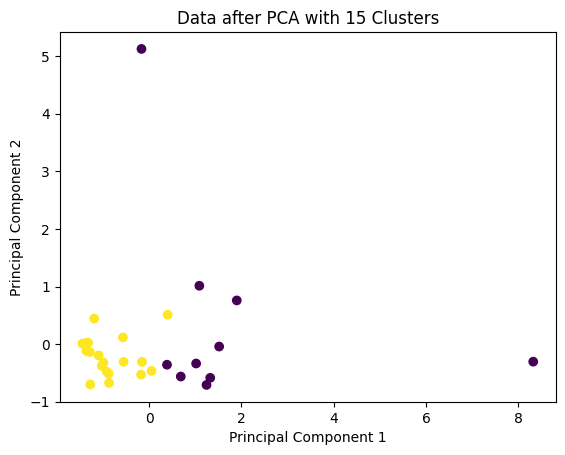

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a K-means model with 15 clusters
kmeans = KMeans(n_clusters=2, random_state=14477830)

# Fit the model on the data after PCA
kmeans.fit(x_train_pca)

# Predict the cluster labels for the data after PCA
cluster_labels = kmeans.predict(x_train_pca)

# Plot the data points with different colors based on the cluster labels
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA with 15 Clusters')
plt.show()


In [47]:
import numpy as np

# Create a K-means model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=14477830)

# Fit the model on the data after PCA
kmeans.fit(x_train_pca)

# Predict the cluster labels for the data after PCA
train_cluster_labels = kmeans.predict(x_train_pca)
test_cluster_labels = kmeans.predict(x_test_pca)

# Convert the cluster labels to a column vector
train_cluster_labels = train_cluster_labels.reshape(-1, 1)
test_cluster_labels = test_cluster_labels.reshape(-1, 1)

# Concatenate the cluster labels with the data after PCA
x_train_pca_with_clusters = np.concatenate((x_train_pca, train_cluster_labels), axis=1)
x_test_pca_with_clusters = np.concatenate((x_test_pca, test_cluster_labels), axis=1)

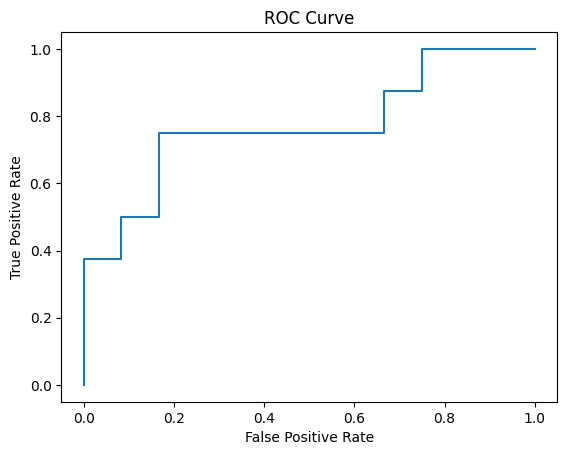

AUC: 0.7708333333333334
Accuracy: 0.75
Recall: 0.75
Precision: 0.6666666666666666
F1 Score: 0.7058823529411765
Confusion Matrix:


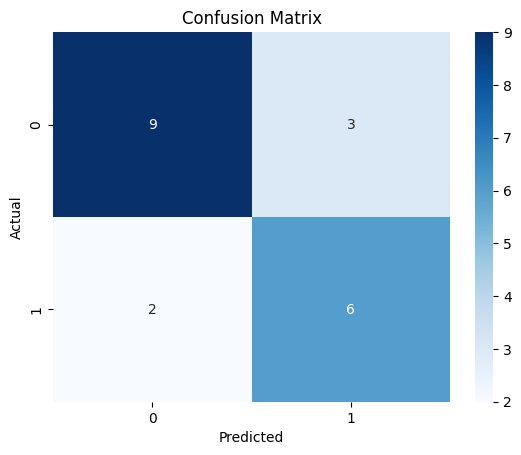

In [48]:
from sklearn.svm import SVC

# Create an SVM model
svm_model_pca = SVC(C=1, kernel='rbf', gamma='scale', probability=True, random_state=14477830)

# Fit the model on the training data after PCA
svm_model_pca.fit(x_train_pca, y_train)

# Make predictions on the test data after PCA
y_pred_pca = svm_model_pca.predict(x_test_pca)

# Calculate the probabilities for the positive class after PCA
y_pred_prob_pca = svm_model_pca.decision_function(x_test_pca)

report(y_test, y_pred_pca, y_pred_prob_pca)



In [49]:
# Specify the file path to save the SVM model
import joblib

#svm_model_file_path = 'svm_model.pkl'

# Save the SVM model to the file
#joblib.dump(svm_model_pca, svm_model_file_path)

#### Adding clusters

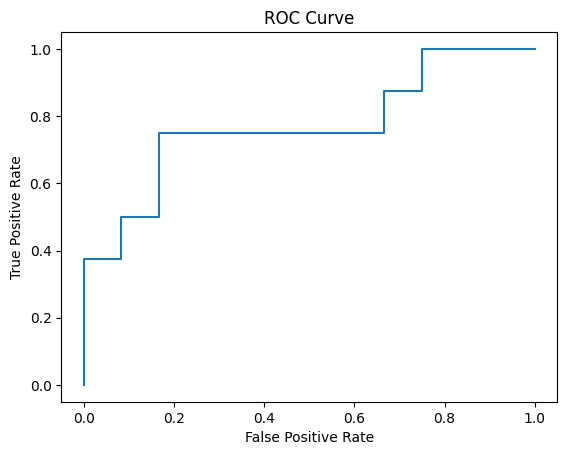

AUC: 0.7708333333333334
Accuracy: 0.75
Recall: 0.75
Precision: 0.6666666666666666
F1 Score: 0.7058823529411765
Confusion Matrix:


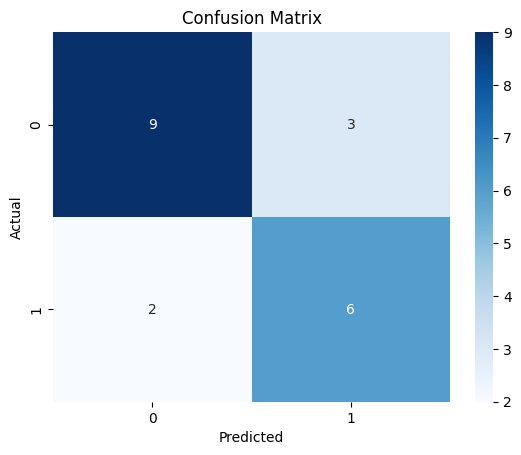

In [50]:
from sklearn.svm import SVC

# Create an SVM model
svm_model_pca = SVC(C=1, kernel='rbf', gamma='scale', probability=True, random_state=14477830)

# Fit the model on the training data after PCA
svm_model_pca.fit(x_train_pca_with_clusters, y_train)

# Make predictions on the test data after PCA
y_pred_pca = svm_model_pca.predict(x_test_pca_with_clusters)

# Calculate the probabilities for the positive class after PCA
y_pred_prob_pca = svm_model_pca.decision_function(x_test_pca_with_clusters)

report(y_test, y_pred_pca, y_pred_prob_pca)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5667 - loss: 0.7012

c:\Program Files\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.5667 - loss: 0.7012 - val_accuracy: 0.6000 - val_loss: 0.6522
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5667 - loss: 0.6628 - val_accuracy: 0.7000 - val_loss: 0.6318
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6667 - loss: 0.6337 - val_accuracy: 0.7000 - val_loss: 0.6166
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.8333 - loss: 0.6098 - val_accuracy: 0.7000 - val_loss: 0.6043
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8333 - loss: 0.5879 - val_accuracy: 0.7000 - val_loss: 0.5940
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8333 - loss: 0.5676 - val_accuracy: 0.7000 - val_loss: 0.5855
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8333 - loss: 0.5483 - val_accuracy: 0.7000 - val_loss: 0.5785
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8333 - loss: 0.5294 - val_accuracy: 0.7000 - val_loss: 0.5731
Epo

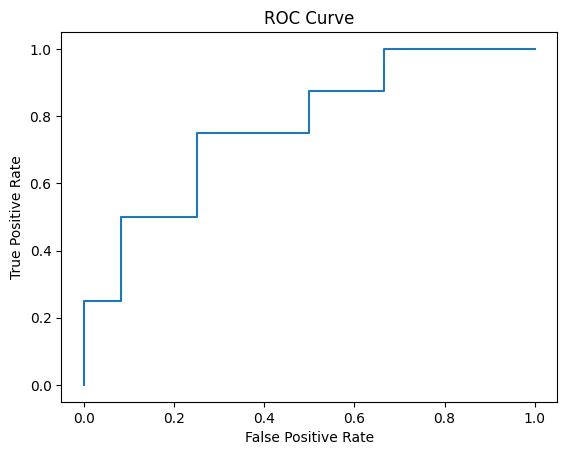

AUC: 0.7708333333333334
Accuracy: 0.7
Recall: 0.625
Precision: 0.625
F1 Score: 0.625
Confusion Matrix:


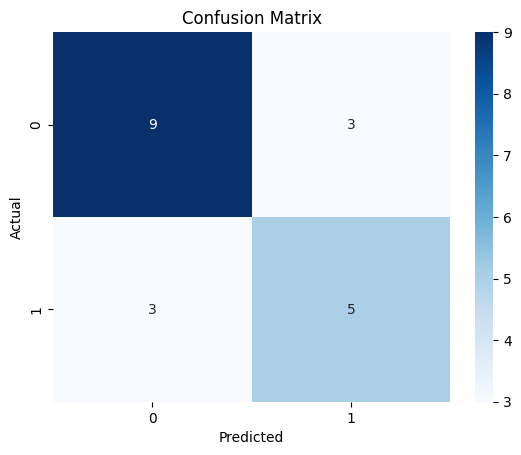

In [51]:
import tensorflow as tf
from tensorflow import keras

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(x_train_pca_with_clusters.shape[1],)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)

# Fit the model on the training data
history = model.fit(x_train_pca_with_clusters, y_train, epochs=10, batch_size=32, validation_data=(x_test_pca_with_clusters, y_test))

# Make predictions on the test data
#y_pred = model.predict_classes(x_test)

# Calculate the probabilities for the positive class
y_pred_prob = model.predict(x_test_pca_with_clusters)
y_pred = (y_pred_prob > 0.5).astype(int)
# Report the results
report(y_test, y_pred, y_pred_prob)

### Find the most important factors

In [54]:
from sklearn.inspection import permutation_importance

# Calculate the permutation importance
perm_importance = permutation_importance(svm_model_pca, x_test_pca_with_clusters, y_test, n_repeats=10, random_state=14477830)

# Get the feature importances and their indices
feature_importances = perm_importance.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

# Get the top 3 most important features
top_features = feature_indices[:3]

# Print the top 3 most important features
print("Top 3 most important features:")
for feature_index in top_features:
    print(predictor_names[feature_index])


Top 3 most important features:
Action Count
Page Count
Duration (seconds)


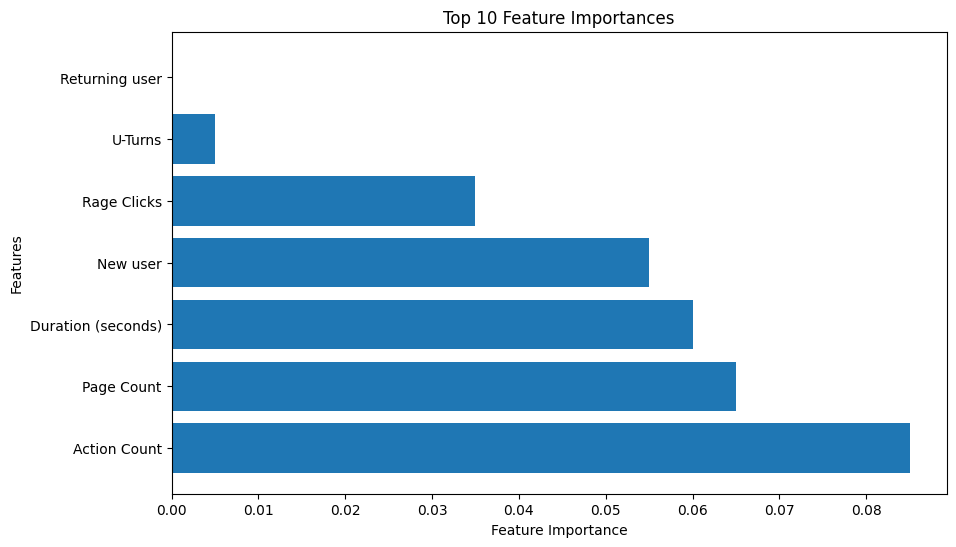

In [55]:
import matplotlib.pyplot as plt

# Get the feature importances and their indices
feature_importances = perm_importance.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

# Get the top features and their importance scores
top_features = feature_indices[:10]
top_scores = feature_importances[top_features]

# Get the names of the top features
top_feature_names = predictor_names[top_features]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_scores, align='center')
plt.yticks(range(len(top_features)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.show()
